In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
sns.set()
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#sns.set_style("whitegrid", {'axes.grid' : False})

## Analysis of Queries

In [2]:

query_dict = {}
with open('msmarco-doctrain-queries.tsv') as file:
    for line in file:
        parts = line.split('\t')
        query_dict[parts[0]] = parts[1]
        

In [3]:
query_lens = [len(q.split()) for q in query_dict.values()]
print(len(query_lens))
print(query_lens[:100])

367013
[12, 24, 2, 5, 8, 4, 2, 5, 7, 6, 4, 5, 7, 4, 4, 10, 3, 6, 3, 8, 4, 6, 3, 4, 8, 2, 8, 2, 7, 6, 5, 6, 7, 7, 4, 6, 5, 6, 6, 6, 7, 7, 3, 6, 2, 5, 6, 6, 5, 6, 6, 6, 6, 2, 2, 6, 8, 8, 4, 6, 6, 4, 5, 6, 2, 7, 6, 2, 3, 6, 6, 5, 9, 5, 5, 4, 3, 13, 2, 5, 5, 7, 7, 4, 5, 7, 7, 6, 4, 5, 3, 5, 6, 3, 5, 3, 7, 5, 4, 6]


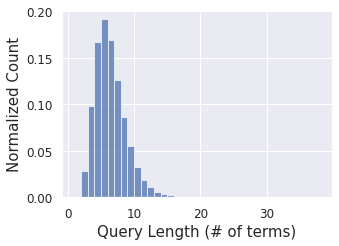

In [28]:
plt.figure(1, figsize=(5, 4))
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.8, wspace =0.5, hspace =0.5)
sns.histplot(query_lens, binwidth=1, stat='density')
plt.xlabel('Query Length (# of terms)')
plt.ylabel('Normalized Count')
plt.savefig('query_length_MS_MARCO.png', dpi=300)

In [ ]:
from wordcloud import WordCloud
text = ' '.join(query_dict.values())
wordcloud = WordCloud(max_font_size=40).generate(text)


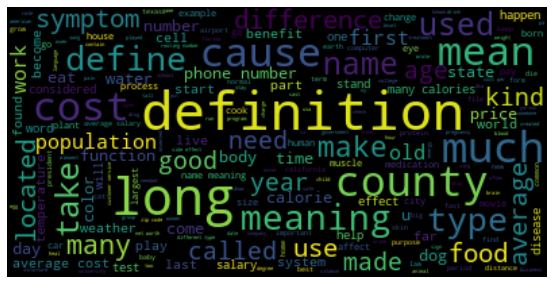

In [29]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.8, wspace =0.5, hspace =0.5)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('query_word_cloud.png', dpi=300)

## Analysis of Documents

In [5]:
doc_dict = {}
with open('msmarco-docs.tsv') as file:
    for line in file:
        parts = line.split('\t')
        doc_dict[parts[0]] = parts[3]

In [6]:
doc_lens = [len(d.split()) for d in doc_dict.values()]
print(len(doc_lens))
print(doc_lens[:100])


3213835
[302, 955, 2870, 1228, 160, 429, 338, 270, 3102, 269, 934, 671, 380, 394, 853, 1268, 450, 361, 721, 162, 804, 223, 1027, 768, 330, 742, 369, 161, 51, 132, 256, 537, 313, 261, 289, 658, 597, 1747, 1315, 711, 605, 593, 219, 427, 1457, 1590, 1113, 392, 810, 261, 316, 319, 261, 219, 116, 278, 158, 683, 199, 599, 594, 5864, 64, 3376, 2724, 625, 228, 1054, 965, 950, 337, 802, 8457, 230, 151, 1980, 154, 955, 21381, 23663, 521, 585, 360, 259, 668, 167, 1475, 852, 793, 335, 529, 6, 370, 331, 88, 132, 946, 27, 289, 439]


/home/ubuntu/anaconda3/envs/colbert-v0.2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


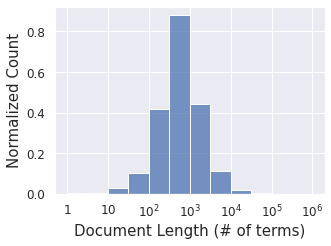

In [30]:
plt.figure(2, figsize=(5, 4))
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.8, wspace =0.5, hspace =0.5)
sns.histplot(np.log10(doc_lens), binwidth=0.5, stat='density')
plt.xlabel('Document Length (# of terms)')
plt.ylabel('Normalized Count')

tickes = [0.0, 1, 2.0, 3, 4.0, 5, 6]
tick_labels = ["$1$", "$10$", "$10^2$", "$10^3$", "$10^4$", "$10^5$", "$10^6$"]
ax = plt.gca()
ax.set_xticks(tickes)
ax.set_xticklabels(tick_labels)
plt.savefig('document_length_MS_MARCO.png', dpi=300)

In [14]:
np.log10(10)

1.0

In [8]:
doc_2_query = collections.defaultdict(list)
with open('msmarco-doctrain-qrels.tsv') as file:
    for line in file:
        parts = line.split(' ')
        doc_2_query[parts[2]].append(parts[0])

NameError: name 'collections' is not defined

In [ ]:
print(list(doc_2_query.keys())[:10])

['D312959', 'D140227', 'D213890', 'D1033338', 'D508131', 'D2286511', 'D69114', 'D1350520', 'D304123', 'D1439360']


In [ ]:
docs = ['D3233725', 'D3048094', 'D2342771']

for doc in docs:
    print(doc)
    for query in doc_2_query[doc]:
        print(query_dict.get(query, None))



D3233725
what is a dogo dog breed

D3048094
D2342771
